In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import glob

In [72]:
dataset = pd.read_csv('./learning_03.txt' , names=['workplace03'])
dataset.shape
dataset['time'] = dataset.index

temp = pd.read_csv('./learning_04.txt' , names=['workplace04'])
dataset['workplace04'] = temp['workplace04']
temp = pd.read_csv('./learning_05.txt' , names=['workplace05'])
dataset['workplace05'] = temp['workplace05']
temp = pd.read_csv('./learning_06.txt' , names=['kitchen'])
dataset['kitchen'] = temp['kitchen']
temp = pd.read_csv('./learning_07.txt' , names=['workplace06'])
dataset['workplace06'] = temp['workplace06']
temp = pd.read_csv('./learning_08.txt' , names=['resting_area'])
dataset['resting_area'] = temp['resting_area']
temp = pd.read_csv('./learning_09.txt' , names=['workplace07'])
dataset['workplace07'] = temp['workplace07']
temp = pd.read_csv('./learning_10.txt' , names=['workplace08'])
dataset['workplace08'] = temp['workplace08']


dataset['time'] = pd.to_timedelta(dataset['time']*10, unit='m')
dataset['hour'] = (dataset['time']/ np.timedelta64(1, 'h')).astype(int)
def mod_for_hour(row):
    return row['hour'] % 24
dataset['sep_hour'] = dataset.apply(mod_for_hour, axis=1)

,workplace03,time,workplace04,workplace05,kitchen,workplace06,resting_area,workplace07,workplace08,hour,sep_hour
0,0,0 days 00:00:00,0,0,0,1,0,0,0,0,0
1,0,0 days 00:10:00,0,0,0,1,0,0,0,0,0
2,0,0 days 00:20:00,0,0,0,1,0,0,0,0,0
3,0,0 days 00:30:00,0,0,0,1,0,0,0,0,0
4,0,0 days 00:40:00,0,0,0,1,0,0,0,0,0
5,0,0 days 00:50:00,0,0,0,1,0,0,0,0,0
6,0,0 days 01:00:00,0,0,0,1,0,0,0,1,1
7,0,0 days 01:10:00,0,0,0,1,0,0,0,1,1
8,0,0 days 01:20:00,0,0,0,1,0,0,0,1,1
9,0,0 days 01:30:00,0,0,0,1,0,0,0,1,1


In [74]:
hour_vs_presence = pd.crosstab(dataset['workplace04'], 
                               dataset['sep_hour'])

In [77]:
%matplotlib inline

presence_percentage = pd.DataFrame()
hour_vs_presence = pd.crosstab(dataset['workplace04'], 
                               dataset['sep_hour'])
for name in ['workplace03','workplace04','workplace05','kitchen','workplace06','resting_area',
             'workplace07', 'workplace08']:
    print (name)
    hour_vs_presence = pd.crosstab(dataset[name], 
                                   dataset['sep_hour'])

    hour_vs_presence_percentage = hour_vs_presence.apply(lambda r: r/r.sum(), axis=0)

    presence_percentage[name] = hour_vs_presence_percentage.ix[1]

workplace03
workplace04
workplace05
kitchen
workplace06
resting_area
workplace07
workplace08


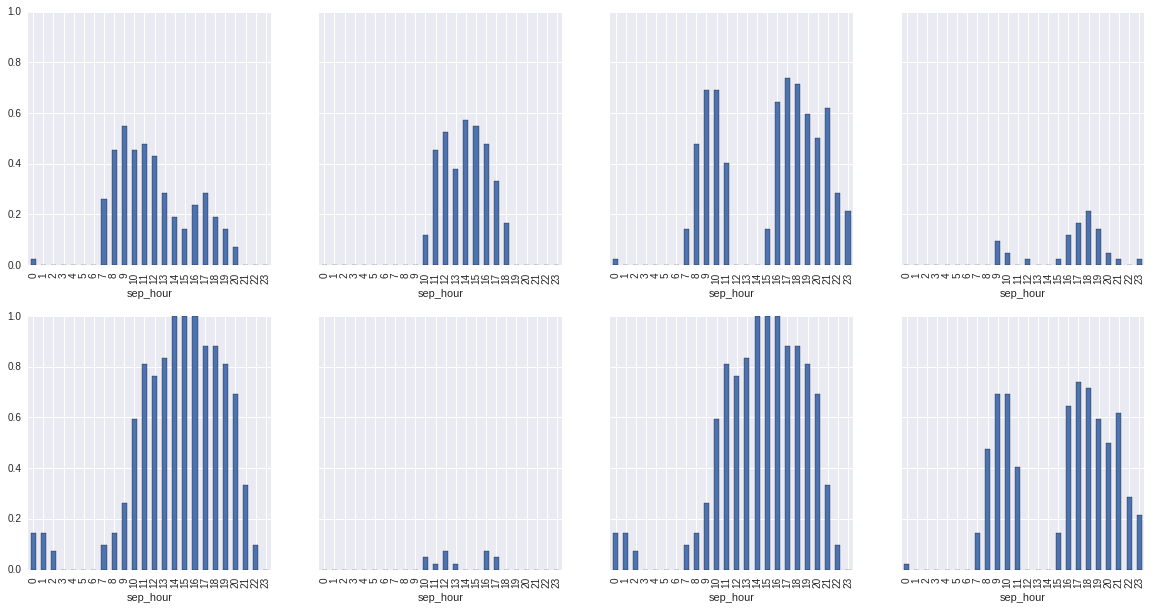

In [91]:
#presence_percentage.plot.bar()
plt.figure(figsize=(20,10))
ax1 = plt.subplot(241)
ax1.set_ylim([0, 1])
presence_percentage.workplace03.plot.bar() #no need to specify for first axis
plt.subplot(242, sharey=ax1)
presence_percentage.workplace04.plot.bar(ax=plt.gca()) #no need to specify for first axis
plt.subplot(243, sharey=ax1)
presence_percentage.workplace05.plot.bar(ax=plt.gca()) #no need to specify for first axis
plt.subplot(244, sharey=ax1)
presence_percentage.kitchen.plot.bar(ax=plt.gca()) #no need to specify for first axis
plt.subplot(245, sharey=ax1)
presence_percentage.workplace06.plot.bar(ax=plt.gca()) #no need to specify for first axis
plt.subplot(246, sharey=ax1)
presence_percentage.resting_area.plot.bar(ax=plt.gca()) #no need to specify for first axis
plt.subplot(247, sharey=ax1)
presence_percentage.workplace06.plot.bar(ax=plt.gca()) #no need to specify for first axis
plt.subplot(248, sharey=ax1)
presence_percentage.workplace05.plot.bar(ax=plt.gca()) #no need to specify for first axis

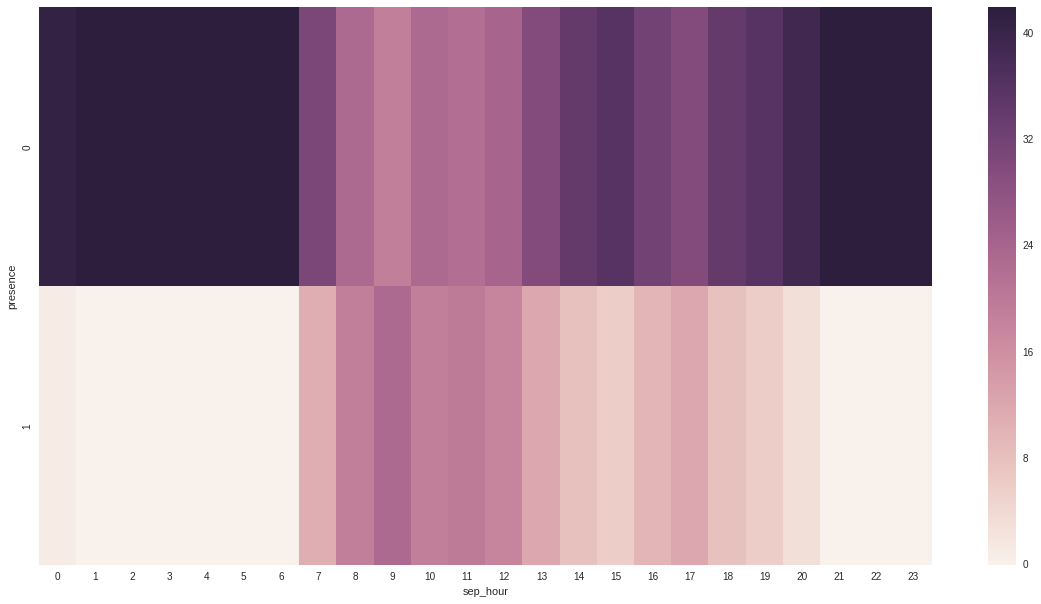

In [11]:
%matplotlib inline
hour_vs_presence = pd.crosstab(dataset['presence'], 
                               dataset['sep_hour'])
fig = plt.figure(figsize=(20,10))
sns_plot = sns.heatmap(hour_vs_presence)
sns_plot.set_label("Heat map of Location of person")

In [36]:
test_data_filenames = ['february*.txt']
train_data_filenames = ['learning*.txt', 'november*.txt']

#create empty dataframe
train_dataset = pd.read_csv('./learning_03.txt' , names=['presence'])
train_dataset['time'] = train_dataset.index
train_dataset['time'] = pd.to_timedelta(train_dataset['time']*10, unit='m')
train_dataset = train_dataset.set_index('time')

for count, name in enumerate(sorted(glob.glob('learning*.txt'))):
    dataset = pd.read_csv(name , names=['presence'])
    train_dataset[count] = dataset['presence'].as_matrix()

print train_dataset.shape

(1008, 9)


In [35]:
%matplotlib
sns.heatmap(train_dataset.loc[0:120], linewidths=.01, annot=True, fmt='d')
plt.yticks(rotation=0)
plt.show()

Using matplotlib backend: Qt4Agg


#TODO

1 The data is very sparse so visualization fails
2 Need a method in panda to splice the data in cy